In [2]:
import pickle 
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.lines import Line2D
import seaborn as sns
sns.set_theme()
import math
import pandas as pd

In [12]:
stat_df = pd.read_csv(Path(Path.home(), "Documents/xray/sample_bench/data/3ca7/63_native_2x/score_analysis.csv"))
rmsd_df = pd.read_csv(Path(Path.home(), "Documents/xray/dev/17_synthetic_native/data/2_state.csv"))

In [10]:
stat_df.head()

,Unnamed: 0,min_xray,avg_min_xray,min_xray_r_free_0,avg_min_xray_r_free_0,min_xray_rmsd,avg_min_xray_rmsd,min_xray_rmsd_avg,avg_min_xray_rmsd_avg
0,0,3.588511,3.643246,0.050097,0.053766,0.074322,0.090242,0.031821,0.033576
1,1,3.539456,3.853174,0.055916,0.075666,0.120377,0.171896,0.029278,0.098500
2,2,3.433750,3.674301,0.046463,0.061279,0.105358,0.147100,0.027263,0.041141
3,3,3.621424,3.668388,0.053502,0.056751,0.089626,0.106025,0.032146,0.034918
4,4,3.610308,3.685360,0.055559,0.059873,0.092064,0.128607,0.030945,0.039820


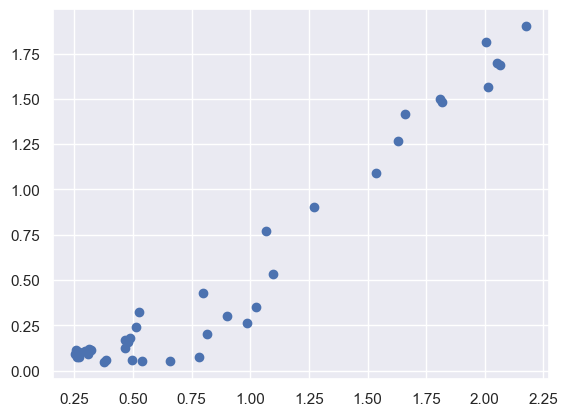

In [15]:
plt.scatter(rmsd_df["rmsd_order"],stat_df["min_xray_rmsd"])
# plt.savefig(Path(Path.home(), "Desktop/tmp.png"))

In [19]:
stat_df.iloc[stat_df["xray_0_min_0"].idxmin()]["xray_0_min_0_pdb"]

'/wynton/group/sali/mhancock/xray/sample_bench/out/3ca7/57_sb_2x_0/9711734/output_109/pdbs/400.pdb'